In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

In [2]:
import Various_Setting_Params as VSP
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
grid = (3,3)

In [4]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/


In [5]:
grid,num_test,lower,upper,coef_seed,x_dist,e_dist,x_low,x_up,x_mean,x_var,bump,iteration_all,batch_size,num_epochs,mu_all,lamb_all = VSP.get_Params(DataPath_Parent)
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]

In [6]:
VSP.set_Params_Mis(DataPath_Parent)
num_feat,deg_all,e,num_train = VSP.get_Params_Mis(DataPath_Parent)
p = num_feat
alpha = e

#### Data Generation

In [7]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"x_test_all.pkl"):
        print("Already Exist")
    else:
        x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
        DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)
        Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Already Exist
DataPath: /Users/zhangxun/Dropbox/Research

#### Run Oracle

In [8]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
Oracle: iter= 20 ,cost_Oracle_Ante= 9.974746843194604
Oracle: iter= 40 ,cost_Oracle_Ante= 9.856448226220069
Oracle: iter= 60 ,cost_Oracle_Ante= 9.949329095991978
Oracle: iter= 80 ,cost_Oracle_Ante= 9.918527311495193
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Oracle: iter= 20 ,cost_Oracle_Ante= 11.338732132399196
Oracle: iter= 40 ,cost_Oracle_Ante= 11.118387299619572
Oracle: iter= 60 ,cost_Oracle_Ante= 11.287140012956202
Oracle: iter= 80 ,cost_Oracle_Ante= 11.232739214324324
D

#### Run OLS

In [9]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 10.066202257534798
OLS: iter= 40 ,cost_OLS_Ante= 9.91609848122351
OLS: iter= 60 ,cost_OLS_Ante= 10.014275543903883
OLS: iter= 80 ,cost_OLS_Ante= 10.07851624680234
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 11.460790124910684
OLS: iter= 40 ,cost_OLS_Ante= 11.172104134086428
OLS: iter= 60 ,cost_OLS_Ante= 11.370962074342195
OLS: iter= 80 ,cost_OLS_Ante= 11.393709347267736
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_

#### Run DDR

In [10]:
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 10.061393294410914
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 9.914878086948772
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 10.023159923819945
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 10.070910947980352
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 11.454695539690645
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 11.168802150412775
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 11.376943228628425
DDR: iter= 80 ,mu= 0.75 ,lamb= 0

#### Run SPO+

In [11]:
method_names = ["spo+"]
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 10.222777849653314
['spo+'] : iter= 40 ,cost_EPO_Ante= 10.11751602978794
['spo+'] : iter= 60 ,cost_EPO_Ante= 10.123548079667243
['spo+'] : iter= 80 ,cost_EPO_Ante= 10.078496234374876
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 11.662703356672207
['spo+'] : iter= 40 ,cost_EPO_Ante= 11.403667902161196
['spo+'] : iter= 60 ,cost_EPO_Ante= 11.608047328811303
['spo+'] : iter= 80 ,cost_EPO_Ante= 11.616450931967405
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Sub

#### Run PG

In [12]:
method_names = ["pg"]
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 10.169004056290138
['pg'] : iter= 40 ,cost_EPO_Ante= 10.215616224485197
['pg'] : iter= 60 ,cost_EPO_Ante= 10.151747614673083
['pg'] : iter= 80 ,cost_EPO_Ante= 10.131334788871595
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 11.785697821960213
['pg'] : iter= 40 ,cost_EPO_Ante= 11.699819598085377
['pg'] : iter= 60 ,cost_EPO_Ante= 11.656763895342385
['pg'] : iter= 80 ,cost_EPO_Ante= 11.558193864709654
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Pa

#### Run LTR

In [13]:
method_names = ["ltr"]
for deg in deg_all:
    mis = deg # model misspecification
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 10.224570137444902
['ltr'] : iter= 40 ,cost_EPO_Ante= 10.12096669469061
['ltr'] : iter= 60 ,cost_EPO_Ante= 10.044288671908403
['ltr'] : iter= 80 ,cost_EPO_Ante= 10.15814064303655
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 11.556794303504573
['ltr'] : iter= 40 ,cost_EPO_Ante= 11.68456409032566
['ltr'] : iter= 60 ,cost_EPO_Ante= 11.580911034470704
['ltr'] : iter= 80 ,cost_EPO_Ante= 11.85542673380648
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortes

### Comparison 

##### DDR vs OLS

In [14]:
regret_d_ante_Dict = {}; h2h_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)
            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                        0,0,0,\
                                        cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_d_ante_Dict,tf)
with open(Result_dir+'h2h_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

In [15]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_d_ante_Dict[mu,lamb]
regret_fig = regret_d_ante_Dict[mu,lamb]

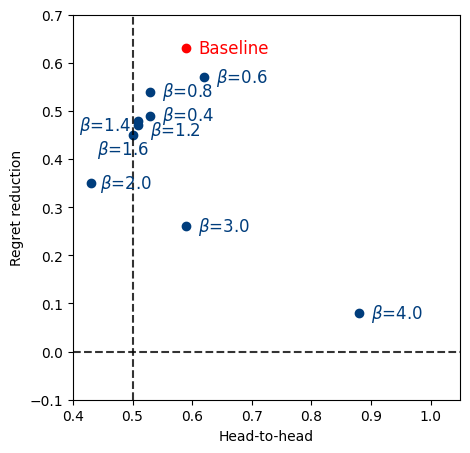

In [16]:
ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] + 0.02, regret_fig[3] - 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] + 0.02, regret_fig[0] - 0.01, fr'$\beta$={deg_all[0]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[1] + 0.02, regret_fig[1] - 0.01, fr'$\beta$={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] + 0.02, regret_fig[2] - 0.01, fr'$\beta$={deg_all[2]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[4] + 0.02, regret_fig[4] - 0.02, fr'$\beta$={deg_all[4]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[5] - 0.1, regret_fig[5] - 0.02, fr'$\beta$={deg_all[5]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[6] - 0.06, regret_fig[6] - 0.04, fr'$\beta$={deg_all[6]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[7] + 0.016, regret_fig[7] - 0.01, fr'$\beta$={deg_all[7]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[8] + 0.02, regret_fig[8] - 0.01, fr'$\beta$={deg_all[8]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[9] + 0.02, regret_fig[9] - 0.01, fr'$\beta$={deg_all[9]}', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.4, 1.05)
ax.set_ylim(-0.1, 0.7)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_OLS_Mis_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()


##### DDR vs SPO+

In [17]:
regret_DDR_vs_SPO_d_ante_Dict = {}; h2h_DDR_vs_SPO_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,\
                                    cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_SPO_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_SPO_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_SPO_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

In [18]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb]
regret_fig = regret_DDR_vs_SPO_d_ante_Dict[mu,lamb]

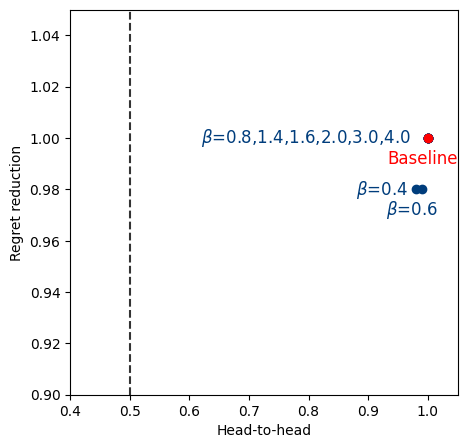

In [19]:
ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 0.068, regret_fig[3] - 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 0.1, regret_fig[0] - 0.002, fr'$\beta$={deg_all[0]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[1] - 0.06, regret_fig[1] - 0.01, fr'$\beta$={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] - 0.38, regret_fig[2] - 0.002, fr'$\beta$=0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[4] + 0.02, regret_fig[4] - 0.02, fr'$\beta$={deg_all[4]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[5] - 0.1, regret_fig[5] - 0.02, fr'$\beta$={deg_all[5]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[6] - 0.06, regret_fig[6] - 0.04, fr'$\beta$={deg_all[6]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[7] + 0.016, regret_fig[7] - 0.01, fr'$\beta$={deg_all[7]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[8] + 0.02, regret_fig[8] - 0.01, fr'$\beta$={deg_all[8]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[9] + 0.02, regret_fig[9] - 0.01, fr'$\beta$={deg_all[9]}', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.9, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_SPO_Mis_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()


### DDR vs PG

In [20]:
regret_DDR_vs_PG_d_ante_Dict = {}; h2h_DDR_vs_PG_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
                cost_PG_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,\
                                    cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_PG_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_PG_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_PG_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_PG_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

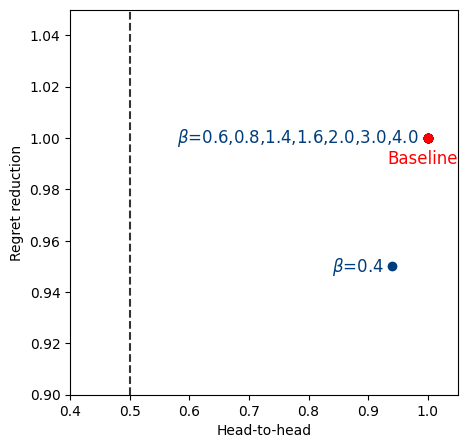

In [21]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_PG_d_ante_Dict[mu,lamb]
regret_fig = regret_DDR_vs_PG_d_ante_Dict[mu,lamb]

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 0.068, regret_fig[3] - 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 0.1, regret_fig[0] - 0.002, fr'$\beta$={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[1] - 0.06, regret_fig[1] - 0.01, fr'$\beta$={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] - 0.42, regret_fig[2] - 0.002, fr'$\beta$=0.6,0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[4] + 0.02, regret_fig[4] - 0.02, fr'$\beta$={deg_all[4]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[5] - 0.1, regret_fig[5] - 0.02, fr'$\beta$={deg_all[5]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[6] - 0.06, regret_fig[6] - 0.04, fr'$\beta$={deg_all[6]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[7] + 0.016, regret_fig[7] - 0.01, fr'$\beta$={deg_all[7]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[8] + 0.02, regret_fig[8] - 0.01, fr'$\beta$={deg_all[8]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[9] + 0.02, regret_fig[9] - 0.01, fr'$\beta$={deg_all[9]}', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.9, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_PG_Mis_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()


### DDR vs LTR

In [22]:
regret_DDR_vs_LTR_d_ante_Dict = {}; h2h_DDR_vs_LTR_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
                cost_LTR_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,\
                                    cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_LTR_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_LTR_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_LTR_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Various_Settings_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driv

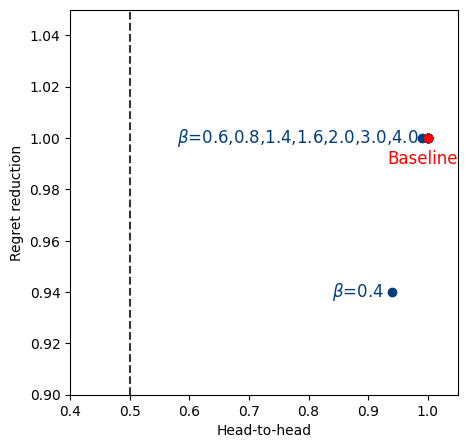

In [23]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb]
regret_fig = regret_DDR_vs_LTR_d_ante_Dict[mu,lamb]

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7, 8, 9]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 0.068, regret_fig[3] - 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 0.1, regret_fig[0] - 0.002, fr'$\beta$={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[1] - 0.06, regret_fig[1] - 0.01, fr'$\beta$={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] - 0.42, regret_fig[2] - 0.002, fr'$\beta$=0.6,0.8,1.4,1.6,2.0,3.0,4.0', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[4] + 0.02, regret_fig[4] - 0.02, fr'$\beta$={deg_all[4]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[5] - 0.1, regret_fig[5] - 0.02, fr'$\beta$={deg_all[5]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[6] - 0.06, regret_fig[6] - 0.04, fr'$\beta$={deg_all[6]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[7] + 0.016, regret_fig[7] - 0.01, fr'$\beta$={deg_all[7]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[8] + 0.02, regret_fig[8] - 0.01, fr'$\beta$={deg_all[8]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[9] + 0.02, regret_fig[9] - 0.01, fr'$\beta$={deg_all[9]}', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.9, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_LTR_Mis_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()
